In [46]:
import numpy
import matplotlib
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt 
import imageio

In [47]:
def histogram_Equilization(image):
    #read image, plot image and plot it's histogram
    hist = imageio.imread(image)
    plt.hist(hist.ravel(),256,[0,256]);
    plt.title("histogram of the original image")
    plt.show()
    #count and plot the intensity distribution
    intensity = [0 for x in range(256)]
    for r in range(len(hist)): 
            for c in range(len(hist[r])):
                intensity[hist[r][c]]+=1
    intensity = np.array(intensity)
    plt.plot(intensity)
    plt.title("intensity distribution of the original image")
    plt.show()
    #convert intensity into probabilities
    intensity = intensity/250000
    #plot the probabilities
    plt.plot(intensity)
    plt.title("intensity probabilities of the original image")
    plt.show()
    #calculate the cummulatiove sum of probabilities
    intensity = np.cumsum(intensity)
    #plot the cum sum
    plt.plot(intensity)
    plt.title("cummulative sum of intensity probs of the original image")
    plt.show()
    #transform cumsum to grey values
    intensity = intensity*255
    #plot the map
    plt.plot(intensity)
    plt.title("cumsum distribution transformed to the dynamic range")
    plt.show()
    #apply the map
    container = np.zeros((hist.shape[0],hist.shape[1]))
    for r in range(len(hist)): 
        for c in range(len(hist[r])):
            container[r][c] = intensity[hist[r][c]]
    #Histogram of Equilized Image
    plt.hist(container.ravel(),256,[0,256]);
    plt.title("equilized histogram")
    plt.show()
    return container

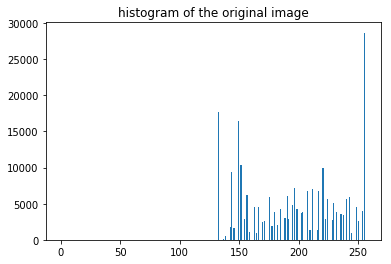

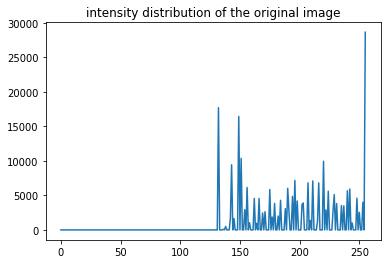

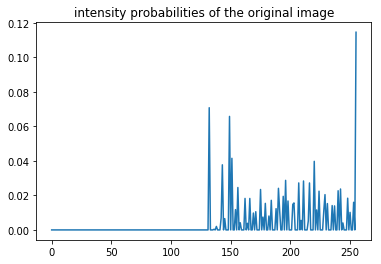

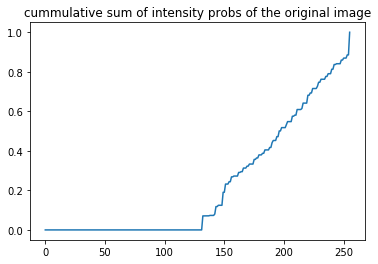

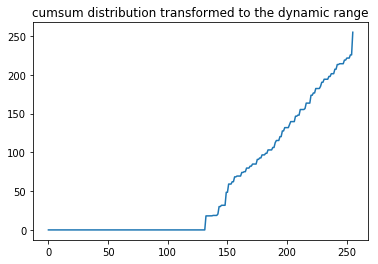

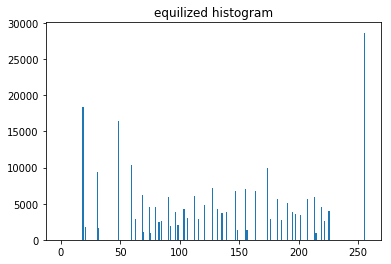

In [48]:
container = histogram_Equilization("hist2.tif")

original image


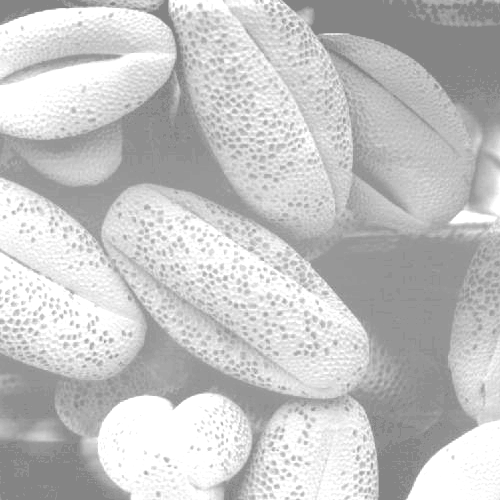

In [49]:
#plot the equilized figure
print("original image")
Image.open("hist2.tif")

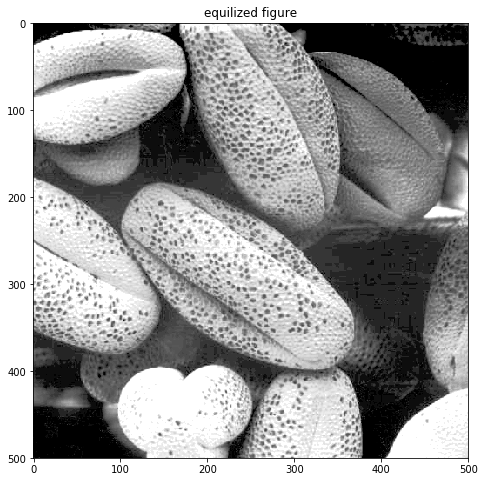

In [50]:
plt.figure(figsize=(8,8))
plt.imshow(container, cmap = matplotlib.cm.Greys_r) 
plt.title("equilized figure")
plt.show()